In [1]:
import pandas as pd
import os

# Load the dataset
os.chdir("..")
data_path = 'datasets'
df = pd.read_csv(os.path.join(data_path, 'wine_quality_cleaned.csv'), index_col=0)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, US to US
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   description        998 non-null    object 
 1   points             998 non-null    int64  
 2   price              998 non-null    float64
 3   variety            998 non-null    object 
 4   description_clean  998 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 46.8+ KB


In [2]:
df = df.reset_index()

In [3]:
import numpy as np

df["price_log"] = np.log1p(df["price"])

df

,country,description,points,price,variety,description_clean,price_log
0,US,"Very good Dry Creek Zin, robust and dry and sp...",89,25.0,Zinfandel,good dry creek zin robust dry spicy really get...,3.258097
1,France,A very herbaceous character makes this wine se...,84,20.0,Bordeaux-style White Blend,herbaceous character make wine seem rather thi...,3.044522
2,US,"A little simple and easy, but there's a wealth...",84,19.0,Rosé,little simple easy wealth raspberry strawberry...,2.995732
3,US,From a dry-farmed vineyard and treated to wild...,88,38.0,Petite Sirah,dry farmed vineyard treated wild yeast minimal...,3.663562
4,US,"From a site near Annapolis, this wine shows a ...",91,62.0,Pinot Noir,site near annapolis wine show preponderance da...,4.143135
...,...,...,...,...,...,...,...
993,France,This is made using a selection of fruit that's...,87,35.0,Chardonnay,made using selection fruit sourced bank serein...,3.583519
994,Spain,"Quite green and also raisiny, which doesn't re...",82,18.0,Red Blend,quite green also raisiny really compute seeing...,2.944439
995,US,Mountain fruit is the key to understanding thi...,93,85.0,Cabernet Sauvignon,mountain fruit key understanding cab meant uni...,4.454347
996,Italy,Hats off to the Zonin family for being among t...,88,15.0,Viognier,hat zonin family among first offer viognier so...,2.772589


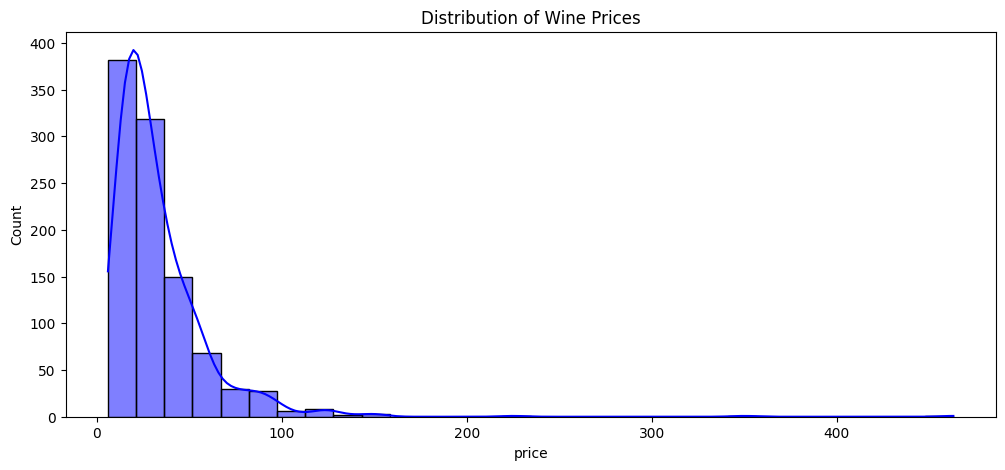

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create the figure
fig, ax = plt.subplots(figsize=(12, 5))

# Plot price distribution
sns.histplot(df["price"], bins=30, kde=True, ax=ax, color="blue")
ax.set_title("Distribution of Wine Prices")

# Show the plot
plt.show()

In [5]:
# Normalize numerical features (points and price_log)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["points_scaled", "price_scaled"]] = scaler.fit_transform(df[["points", "price_log"]])

df

,country,description,points,price,variety,description_clean,price_log,points_scaled,price_scaled
0,US,"Very good Dry Creek Zin, robust and dry and sp...",89,25.0,Zinfandel,good dry creek zin robust dry spicy really get...,3.258097,0.354598,-0.136111
1,France,A very herbaceous character makes this wine se...,84,20.0,Bordeaux-style White Blend,herbaceous character make wine seem rather thi...,3.044522,-1.131082,-0.493754
2,US,"A little simple and easy, but there's a wealth...",84,19.0,Rosé,little simple easy wealth raspberry strawberry...,2.995732,-1.131082,-0.575456
3,US,From a dry-farmed vineyard and treated to wild...,88,38.0,Petite Sirah,dry farmed vineyard treated wild yeast minimal...,3.663562,0.057462,0.542865
4,US,"From a site near Annapolis, this wine shows a ...",91,62.0,Pinot Noir,site near annapolis wine show preponderance da...,4.143135,0.948870,1.345938
...,...,...,...,...,...,...,...,...,...
993,France,This is made using a selection of fruit that's...,87,35.0,Chardonnay,made using selection fruit sourced bank serein...,3.583519,-0.239674,0.408828
994,Spain,"Quite green and also raisiny, which doesn't re...",82,18.0,Red Blend,quite green also raisiny really compute seeing...,2.944439,-1.725354,-0.661349
995,US,Mountain fruit is the key to understanding thi...,93,85.0,Cabernet Sauvignon,mountain fruit key understanding cab meant uni...,4.454347,1.543143,1.867083
996,Italy,Hats off to the Zonin family for being among t...,88,15.0,Viognier,hat zonin family among first offer viognier so...,2.772589,0.057462,-0.949123


In [6]:
df["text_length"] = df["description_clean"].apply(lambda x: len(x.split()))

In [7]:
# Encode the categorical variety feature
from sklearn.preprocessing import StandardScaler, LabelEncoder
l_encover = LabelEncoder()
df["variety_encoded"] = l_encover.fit_transform(df["variety"])


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
df["country_encoded"] = label_encoder.fit_transform(df["country"])

df

,country,description,points,price,variety,description_clean,price_log,points_scaled,price_scaled,text_length,variety_encoded,country_encoded
0,US,"Very good Dry Creek Zin, robust and dry and sp...",89,25.0,Zinfandel,good dry creek zin robust dry spicy really get...,3.258097,0.354598,-0.136111,28,104,3
1,France,A very herbaceous character makes this wine se...,84,20.0,Bordeaux-style White Blend,herbaceous character make wine seem rather thi...,3.044522,-1.131082,-0.493754,16,8,0
2,US,"A little simple and easy, but there's a wealth...",84,19.0,Rosé,little simple easy wealth raspberry strawberry...,2.995732,-1.131082,-0.575456,16,77,3
3,US,From a dry-farmed vineyard and treated to wild...,88,38.0,Petite Sirah,dry farmed vineyard treated wild yeast minimal...,3.663562,0.057462,0.542865,24,61,3
4,US,"From a site near Annapolis, this wine shows a ...",91,62.0,Pinot Noir,site near annapolis wine show preponderance da...,4.143135,0.948870,1.345938,22,66,3
...,...,...,...,...,...,...,...,...,...,...,...,...
993,France,This is made using a selection of fruit that's...,87,35.0,Chardonnay,made using selection fruit sourced bank serein...,3.583519,-0.239674,0.408828,18,15,0
994,Spain,"Quite green and also raisiny, which doesn't re...",82,18.0,Red Blend,quite green also raisiny really compute seeing...,2.944439,-1.725354,-0.661349,28,72,2
995,US,Mountain fruit is the key to understanding thi...,93,85.0,Cabernet Sauvignon,mountain fruit key understanding cab meant uni...,4.454347,1.543143,1.867083,34,12,3
996,Italy,Hats off to the Zonin family for being among t...,88,15.0,Viognier,hat zonin family among first offer viognier so...,2.772589,0.057462,-0.949123,24,100,1


In [9]:
df_transformed = df[["country_encoded","points_scaled","description_clean","variety_encoded","text_length","price_log","price_scaled"]]

In [10]:
df_transformed.to_csv('datasets/wine_quality_transformed.csv', index=True)